## Prediction using Supervised ML

##### By Gudala Durga VamsiKumar 

### Predict the percentage of an student based on the no. of study hours.

## <font color = "green">Linear Regression</font>

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Step 1: Importing Library

In [74]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression

In [75]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(20)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Step 2: Data Exploration

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [77]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step 3 :Data Preprocessing

Checking no. of null values

In [78]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

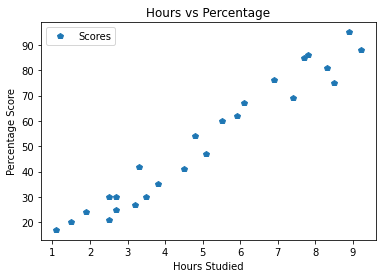

In [79]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='p')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### Splitting data 

In [80]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [81]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [82]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [83]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) 

#### <font color = "green">Linear Regression</font> 

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [84]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


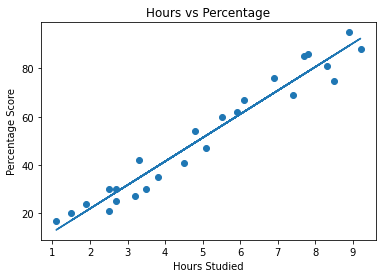

In [85]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [86]:
### Predicting Test_input
y_pred = regressor.predict(X_test)

In [87]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [88]:
# You can also test with your own data
hours = np.array(9.25)
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


### Results

In [89]:
# Building confusion MAtrix

from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652


Here you can see by using the linearRegression we get the Approximately 97% accuracy with 4.4 error

## <font color = "Red">Thank you</font> 